# OCR With EasyOCR

## Installation

In [1]:
# !pip install -q easyocr

  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/3e/17/d605f9b95078fb9a4a5d931480b5d35755dc8018349bf70c859f0be47c6d/torch-2.3.1-cp39-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchvision>=0.5 from https://files.pythonhosted.org/packages/e8/26/e414c50dd13a19f5a4a68e32503e86066ce1b2cdf84b6ec49d25e3a85465/torchvision-0.18.1-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/1c/9b/583c8d9259f6fc19413f83fd18dd8e6cbc8eefb0b4dc6da52dd151fe3272/opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/d6/6c/f528c6b80b4e

In [9]:
from easyocr import Reader
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def cv2_imshow(img, gray=True):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.grid(False)
    plt.axis(False)
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

## Parameters

In [11]:
languages_list = ['en', 'pt']
print(languages_list)

['en', 'pt']


In [12]:
gpu = False

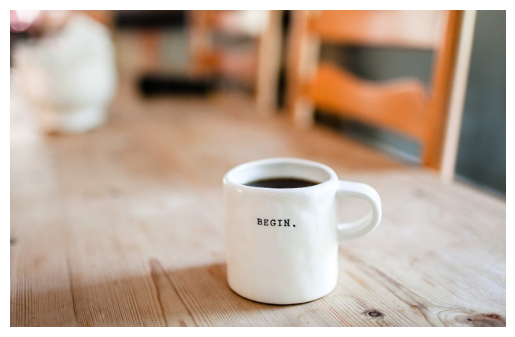

In [13]:
img = cv2.imread('Sources/Images/cup.jpg')
cv2_imshow(img, gray=False)

In [14]:
original = img.copy()

## Text Recognition

In [15]:
reader = Reader(languages_list, gpu)
results = reader.readtext(img)


Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [16]:
results

[([[373, 313], [435, 313], [435, 331], [373, 331]],
  'BEGIN .',
  0.977640551358287)]

## Writing the results

### Text

In [17]:
font = 'Sources/Fonts/calibri.ttf'

In [18]:
def write_text(text, x, y, img, font, color=(50, 50, 255), font_size=22):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font=font, fill=color)
    img = np.array(img_pil)
    return img

In [19]:
def box_coordinates(box):
    (lt, rt, br, bl) = box
    lt = (int(lt[0]), int(lt[1]))
    rt = (int(rt[0]), int(rt[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    return lt, rt, br, bl

In [20]:
results[0][0]

[[373, 313], [435, 313], [435, 331], [373, 331]]

In [21]:
box_coordinates(results[0][0])

((373, 313), (435, 313), (435, 331), (373, 331))

In [24]:
def draw_img(img, lt, br, color=(200, 255, 0), thickness=2):
    cv2.rectangle(img, lt, br, color, thickness)
    return img

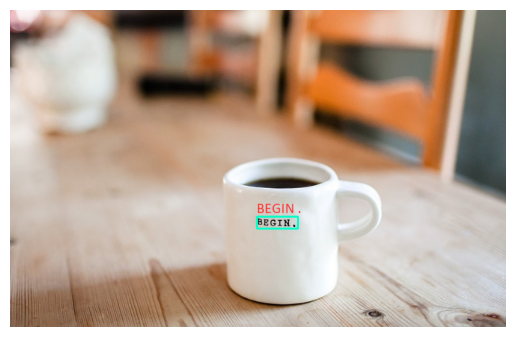

In [26]:
img = original.copy()
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)
cv2_imshow(img)

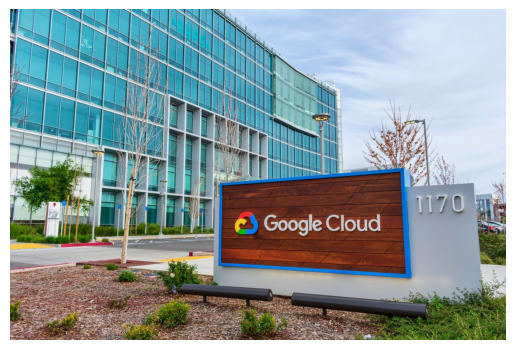

Using CPU. Note: This module is much faster with a GPU.


[([[908, 412], [1032, 412], [1032, 468], [908, 468]],
  '1170',
  0.8081685304641724),
 ([[566, 454], [845, 454], [845, 520], [566, 520]],
  'Google Cloud',
  0.9968600770476318)]

In [29]:
img = cv2.imread('Sources/Images/google-cloud.jpg')
cv2_imshow(img)
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

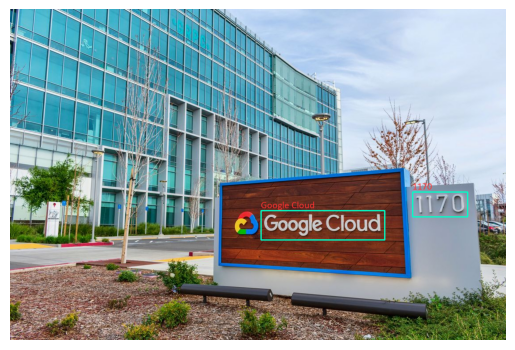

In [30]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)
cv2_imshow(img)

## Other Languages

In [31]:
languages_list = ['en', 'fr']
languages_list

['en', 'fr']

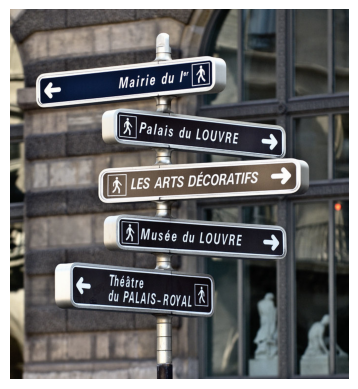

Using CPU. Note: This module is much faster with a GPU.


[([[216, 122], [370, 122], [370, 170], [216, 170]],
  'Mairie du /"',
  0.786972071962722),
 ([[257, 222], [378, 222], [378, 272], [257, 272]],
  '[Palais du',
  0.9477302949255717),
 ([[242, 322], [515, 322], [515, 376], [242, 376]],
  'LES ARTS DÉCORATIFS',
  0.9792452043728148),
 ([[262, 440], [481, 440], [481, 492], [262, 492]],
  'Musée du LOUVRE',
  0.9961915211284367),
 ([[197, 537], [282, 537], [282, 577], [197, 577]],
  'Théâtre',
  0.9997381634232319),
 ([[195, 569], [377, 569], [377, 613], [195, 613]],
  'du PaLAIS-RoyAL',
  0.25502290931340554),
 ([[377.02985749985464, 236.11942999941868],
   [475.90943152163265, 248.1536282272754],
   [468.97014250014536, 283.8805700005813],
   [371.09056847836735, 270.8463717727246]],
  'LOUVRE',
  0.9940417444665092)]

In [33]:
img = cv2.imread('Sources/Images/french.jpg')
cv2_imshow(img)
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

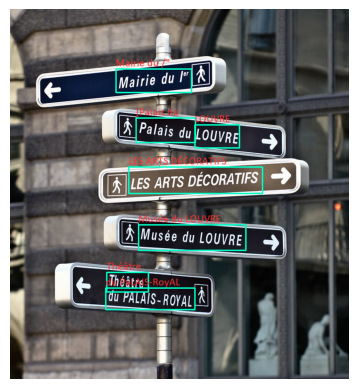

In [34]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)
cv2_imshow(img)

In [38]:
languages_list = ['en', 'ch_sim']
languages_list

['en', 'ch_sim']

In [42]:
font = 'Sources/Fonts/simsun.ttc'

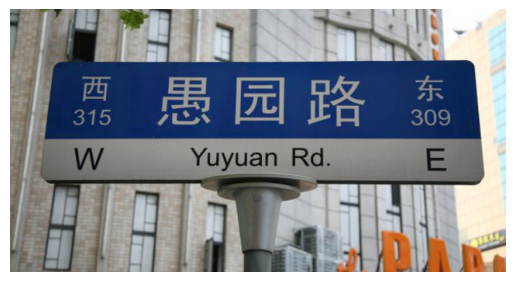

In [43]:
img = cv2.imread('Sources/Images/chinese.jpg')
cv2_imshow(img)

In [44]:
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

Using CPU. Note: This module is much faster with a GPU.


[([[86, 80], [134, 80], [134, 128], [86, 128]], '西', 0.8807544803295322),
 ([[187, 75], [469, 75], [469, 165], [187, 165]], '愚园路', 0.9562881003890523),
 ([[517, 81], [565, 81], [565, 123], [517, 123]], '东', 0.9955671193044715),
 ([[78, 126], [136, 126], [136, 156], [78, 156]], '315', 0.9999929798007293),
 ([[514, 124], [574, 124], [574, 156], [514, 156]], '309', 0.9993703365325928),
 ([[81, 175], [125, 175], [125, 211], [81, 211]], 'I', 0.9352140927291295),
 ([[227, 174], [351, 174], [351, 218], [227, 218]],
  'Yuyuan',
  0.5944551278759272),
 ([[360, 176], [412, 176], [412, 208], [360, 208]], 'Rd_', 0.9625880965580587),
 ([[529, 173], [569, 173], [569, 213], [529, 213]], 'E', 0.4665005187135307)]

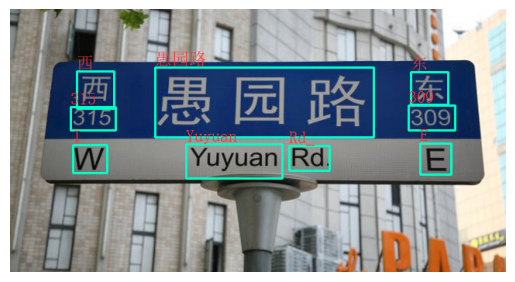

In [45]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)
cv2_imshow(img)

## Text with background

In [46]:
def text_background(text, x, y, img, font, font_size=32, color=(200, 255, 0)):
    background = np.full(img.shape, (0, 0, 0), dtype=np.uint8)
    text_back = write_text(text, x, y, background, font, font_size=font_size)
    text_back = cv2.dilate(text_back, (np.ones((3,5), np.uint8)))
    fx, fy, fw, fh = cv2.boundingRect(text_back[:,:,2])
    cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), color, -1)
    return img

In [47]:
font = 'Sources/Fonts/calibri.ttf'


In [51]:
languages_list = ['en', 'pt']
languages_list

['en', 'pt']

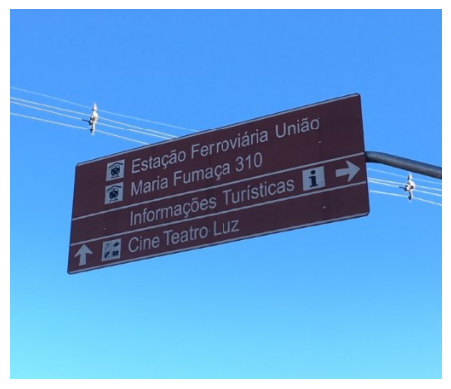

In [60]:
img = cv2.imread('Sources/Images/plate-information.jpg')
cv2_imshow(img)

In [61]:
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

Using CPU. Note: This module is much faster with a GPU.


[([[260, 164], [302, 164], [302, 196], [260, 196]], '310', 0.9998593219722675),
 ([[344, 184], [368, 184], [368, 212], [344, 212]], 'i', 0.7068654382644333),
 ([[134, 262], [180, 262], [180, 290], [134, 290]],
  'Cine',
  0.9994896054267883),
 ([[304.07944680100655, 128.69533616120788],
   [366.51745895966945, 117.36831363725129],
   [369.92055319899345, 145.30466383879212],
   [307.48254104033055, 155.6316863627487]],
  'União',
  0.9999804344679036),
 ([[202.01488842937005, 155.701488842937],
   [304.70640266490693, 133.705633508088],
   [309.98511157062995, 157.298511157063],
   [207.29359733509307, 180.294366491912]],
  'Ferroviária',
  0.9996578923894408),
 ([[132.65739357167092, 171.12591485733674],
   [208.5373938916925, 155.3994900067786],
   [214.34260642832908, 182.87408514266326],
   [138.4626061083075, 199.6005099932214]],
  'Estação',
  0.9999687303699925),
 ([[183.7701175612585, 185.99310580513264],
   [261.70640266490693, 174.705633508088],
   [265.2298824387415, 199.006

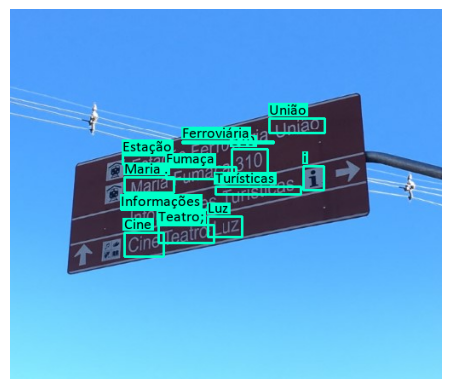

In [62]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = text_background(text, lt[0], lt[1], img, font, 18, (200, 255, 0))
    img = write_text(text, lt[0], lt[1], img, font, (0, 0, 0), 18)
cv2_imshow(img)